# Anime Recommender Dataset Analysis

In [80]:
import pandas as pd
import numpy as np
import math
import random

In [81]:
anime = pd.read_csv('anime.csv')
rating = pd.read_csv('rating.csv')

In [82]:
print(anime.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [83]:
print(rating.head())

   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1


In [84]:
# get rating
user_groups = rating.groupby('user_id')
user_distinct_anime = user_groups['anime_id'].apply(lambda x: list(x.unique())).reset_index()
print(user_distinct_anime)


       user_id                                           anime_id
0            1  [20, 24, 79, 226, 241, 355, 356, 442, 487, 846...
1            2                              [11771, 12189, 16417]
2            3  [20, 154, 170, 199, 225, 341, 430, 527, 552, 8...
3            4  [6, 72, 121, 150, 166, 205, 226, 857, 1292, 14...
4            5  [6, 15, 17, 18, 20, 22, 24, 30, 45, 47, 57, 63...
...        ...                                                ...
73510    73512  [60, 98, 101, 120, 199, 226, 339, 355, 552, 65...
73511    73513  [1, 5, 71, 101, 164, 180, 181, 195, 196, 199, ...
73512    73514                                              [512]
73513    73515  [1, 5, 6, 19, 27, 30, 33, 57, 67, 71, 72, 73, ...
73514    73516                                        [790, 8074]

[73515 rows x 2 columns]


In [85]:
num_watched = user_distinct_anime['anime_id'].apply(lambda x: len(x))

In [86]:
print(num_watched.sort_values())

69           1
58           1
68162        1
68176        1
49441        1
         ...  
59641     2633
57618     2702
53696     2905
42634     3747
48764    10227
Name: anime_id, Length: 73515, dtype: int64


In [87]:
user_distinct_anime[user_distinct_anime.index == 48764]

,user_id,anime_id
48764,48766,"[1, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 22, 23..."


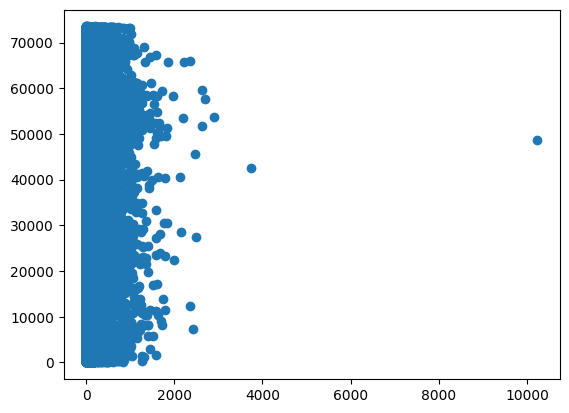

In [88]:
import matplotlib.pyplot as plt

plt.scatter(num_watched, user_distinct_anime['user_id'])

In [107]:
finRate = rating.drop(user_groups.get_group(48766).index)

In [109]:
finRate.to_csv('rating_outlier_dropped.csv')

In [110]:
finRate = pd.read_csv('rating_outlier_dropped.csv')

In [111]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [112]:
genres = {'Drama'}
for an_genre in anime['genre']:
    if isinstance(an_genre, str):
        gen = an_genre.split(', ')
        for genre in gen:
            genres.add(genre)

In [94]:
genreId = {'Drama':0}
genres = list(genres)
for id in range(len(genres)):
    genreId[genres[id]] = id   
    

In [158]:
types = anime['type'].unique()
typeId = {'Movie': 0}
for i in range(len(types)):
    typeId[(str)(types[i])] = i

In [159]:
typeId

{'Movie': 0, 'TV': 1, 'OVA': 2, 'Special': 3, 'Music': 4, 'ONA': 5, 'nan': 6}

In [114]:
len(finRate)

7803510

In [140]:
genreList = []
for anGenre in anime['genre']:
    tbapp = [0 for i in range(len(genreId))]
    if isinstance(anGenre, str):
        fingenre = anGenre.split(', ')
        for genre in fingenre:
            tbapp[genreId[genre]] = 1
    genreList.append(tbapp)

In [151]:
genre_df = pd.DataFrame(genreList, columns=genreId.keys())
genre_df['anime_id'] = anime['anime_id'].values
finRate = finRate.merge(genre_df, on='anime_id', how='left')


In [161]:
typeList = []
for typeVal in anime['type']:
    typeVal = str(typeVal)
    typeList.append(typeId[typeVal])

In [165]:
type_df = pd.DataFrame(typeList)
type_df['anime_id'] = anime['anime_id'].values
finRate = finRate.merge(type_df, on='anime_id', how='left')

In [115]:
user_groups = finRate.groupby('user_id')

In [131]:
groupsDict = user_groups.groups

In [190]:
# groupsDict.keys()

In [174]:
members = anime[['anime_id']].copy()
members['members'] = anime['members'].values

finRate = finRate.merge(members, on='anime_id', how='left')

In [177]:
episodes = anime[['anime_id']].copy()
episodes['episodes'] = anime['episodes'].values
episodes['name'] = anime['name'].values
episodes['rating'] = anime['rating'].values

In [178]:
finRate = finRate.merge(episodes, on='anime_id', how='left')

In [180]:
finRate = finRate.rename(columns={0: 'type'})

In [186]:
finRate = finRate.drop(columns=['Unnamed: 0'])

In [188]:
finRate.to_csv('allUserAnimeDataFinal.csv')